In [1]:
import json
import matplotlib.pyplot as plt

In [ ]:
base_model = input("Enter the directory for model 1")
trained_model = input("Enter the directory for model 2")

In [ ]:
def load_scores(file_path):
    with open(file_path, "r") as f:
        return [json.loads(line)["scores"] for line in f]


# Load both models
base_scores = load_scores(f"../data/evaluation_data/evaluation_results_{base_model}.jsonl")
trained_scores = load_scores(
    f"../data/evaluation_data/evaluation_results_{trained_model}.jsonl"
)


# Extract averages
def compute_averages(scores):
    return {
        "BLEU": sum(x["BLEU"] for x in scores) / len(scores),
        "ROUGE-1": sum(x["ROUGE-1"] for x in scores) / len(scores),
        "ROUGE-2": sum(x["ROUGE-2"] for x in scores) / len(scores),
        "ROUGE-L": sum(x["ROUGE-L"] for x in scores) / len(scores),
    }

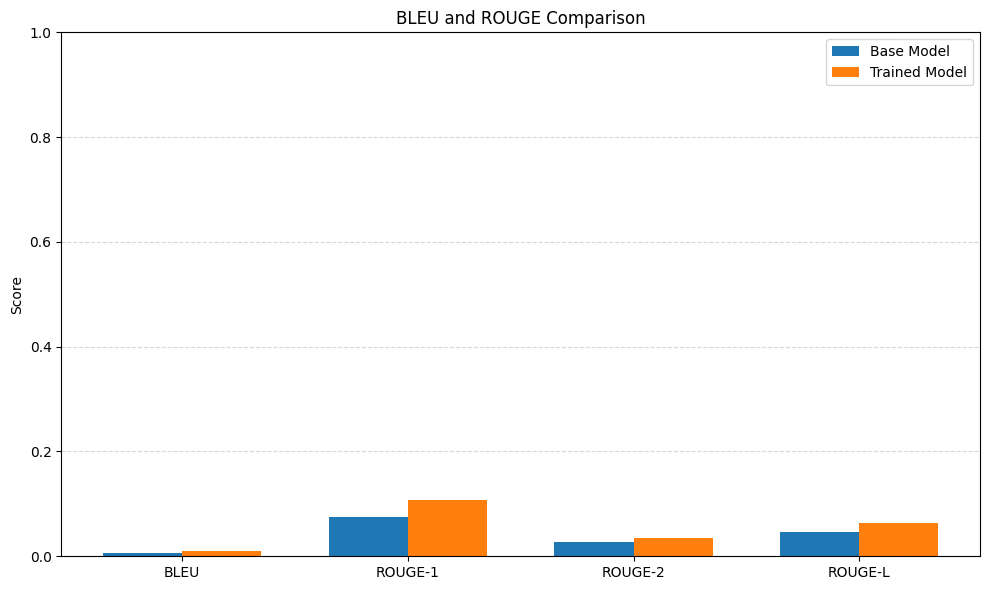

In [5]:
base_avg = compute_averages(base_scores)
trained_avg = compute_averages(trained_scores)

# Plotting
labels = list(base_avg.keys())
base_values = [base_avg[k] for k in labels]
trained_values = [trained_avg[k] for k in labels]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, base_values, width, label="Base Model")
plt.bar([p + width for p in x], trained_values, width, label="Trained Model")

plt.ylabel("Score")
plt.title("BLEU and ROUGE Comparison")
plt.xticks([p + width / 2 for p in x], labels)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

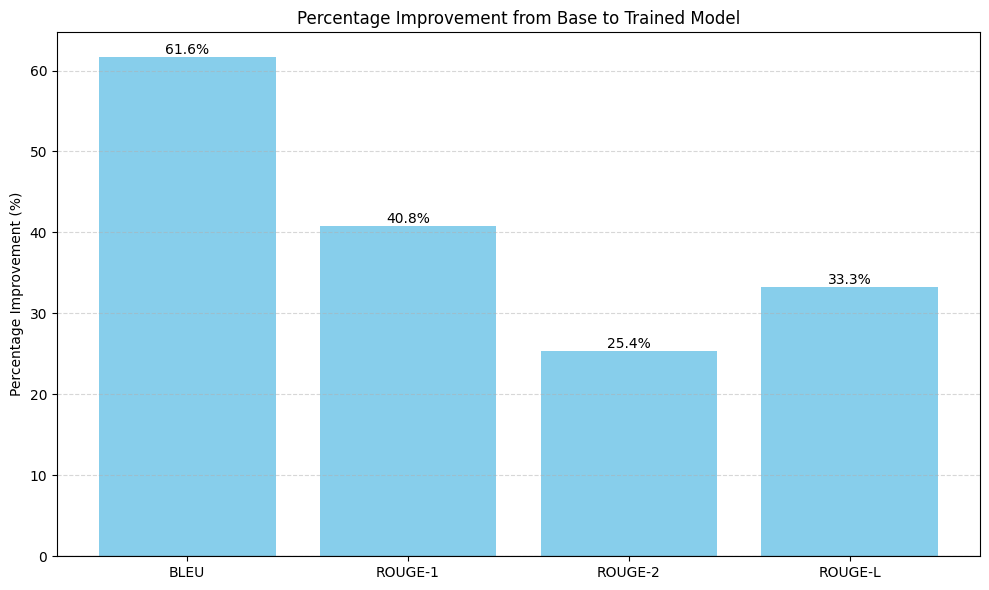

In [8]:
percent_improvement = {
    metric: 100 * (trained_avg[metric] - base_avg[metric]) / base_avg[metric]
    for metric in base_avg
}

labels = list(percent_improvement.keys())
values = [percent_improvement[k] for k in labels]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color="skyblue")
plt.ylabel("Percentage Improvement (%)")
plt.title("Percentage Improvement from Base to Trained Model")
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f"{yval:.1f}%",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

# How many instances of "Coldstart" training data?
## 581 lines total